### Validation for lake level derived by SWOT data.
#### 1. Comparison among the lake levels derived by SWOT pixc data, SWOT LakeSp data, and DAHITI data.
#### 2. Comparison between simple average and area-weighted average method in swot pixc data processing.

In [ ]:
import pickle
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import netCDF4 as nc
import seaborn as sns
from datetime import datetime
import matplotlib.ticker as ticker 
from matplotlib import dates as mdates
from matplotlib.ticker import MultipleLocator
from utils.date_transform import date_to_decimal, decimal_to_date


In [161]:
## 设置全局字体和样式
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 设置为微软雅黑
plt.rcParams['font.weight'] = 'bold'  # 设置全局字体加粗
plt.rcParams['axes.labelweight'] = 'bold'  # 坐标轴标签加粗
plt.rcParams['axes.titleweight'] = 'bold'  # 标题加粗


In [162]:
## dianchi
path_dahiti_pix_lakesp_dianchi = 'data/eva_data/dahiti_pix_lakesp_dianchi.csv' ## 
## erhai
path_dahiti_pix_lakesp_erhai = 'data/eva_data/dahiti_pix_lakesp_erhai.csv'


In [163]:
dahiti_pix_lakesp_dianchi = pd.read_csv(path_dahiti_pix_lakesp_dianchi, index_col=0)
dahiti_pix_lakesp_erhai = pd.read_csv(path_dahiti_pix_lakesp_erhai, index_col=0)
dahiti_pix_lakesp_erhai


,dahiti_wse,SWOT_pixc_wse,SWOT_LakeSP_wse,SWOT_pixc_wse_cor,SWOT_LakeSP_wse_cor
year_month,,,,,
2023-09,1965.4342,1966.0171,NaN,1965.4246,NaN
2023-11,1965.5702,1966.2931,1966.4545,1965.7004,1965.704113
2023-12,1965.6812,1966.1672,1966.3710,1965.5747,1965.620613
2024-01,1965.5062,1966.0776,1966.4045,1965.4851,1965.654113
2024-03,1965.3011,1965.8469,1965.9360,1965.2544,1965.185613
2024-04,1965.0922,1965.6117,1965.7800,1965.0190,1965.029613
2024-05,1964.8522,1965.4890,1965.5990,1964.8965,1964.848613
2024-06,1964.8743,1965.4524,1965.7430,1964.8599,1964.992613
2024-07,1964.8757,1965.4172,1965.5570,1964.8247,1964.806613


### 1. SWOT pixc data, SWOT LakeSp data, and DAHITI data.


In [164]:
def calculate_rmse_corr(ref_vars_df, var_ref_name='dahiti_wse', 
                        var_1_name='SWOT_pixc_wse_cor', var_2_name='SWOT_LakeSP_wse_cor'):
  rmse_pixc_dahiti = np.sqrt(((ref_vars_df[var_1_name] - \
                                      ref_vars_df[var_ref_name]) ** 2).mean())
  rmse_lakesp_dahiti = np.sqrt(((ref_vars_df[var_2_name] - \
                                      ref_vars_df[var_ref_name]) ** 2).mean())

  corr_ref_var1 = ref_vars_df[var_ref_name].corr(ref_vars_df[var_1_name])
  corr_ref_var2 = ref_vars_df[var_ref_name].corr(ref_vars_df[var_2_name])
  return rmse_pixc_dahiti, rmse_lakesp_dahiti, corr_ref_var1, corr_ref_var2


rmse_pixc_dahiti_dianchi, rmse_lakesp_dahiti_dianchi, corr_pixc_dahiti_dianchi, \
                                          corr_lakesp_dahiti_dianchi = calculate_rmse_corr(dahiti_pix_lakesp_dianchi, var_ref_name='dahiti_wse',
                                          var_1_name='SWOT_pixc_wse_cor', 
                                          var_2_name='SWOT_LakeSP_wse_cor')

rmse_pixc_dahiti_erhai, rmse_lakesp_dahiti_erhai, corr_pixc_dahiti_erhai, \
                                          corr_lakesp_dahiti_erhai = calculate_rmse_corr(dahiti_pix_lakesp_erhai, var_ref_name='dahiti_wse',
                                          var_1_name='SWOT_pixc_wse_cor',
                                          var_2_name='SWOT_LakeSP_wse_cor')


In [165]:
def calculate_slope_intercept(ref_vars_df, var_ref_name='dahiti_wse',
                              var_1_name='SWOT_pixc_wse', var_2_name='SWOT_LakeSP_wse'):

    ref_var1_df = ref_vars_df[[var_ref_name, var_1_name]].dropna() 
    ref_var2_df = ref_vars_df[[var_ref_name, var_2_name]].dropna()
    x_ref_var1, y_ref_var1 = ref_var1_df[var_ref_name].values, ref_var1_df[var_1_name].values
    x_ref_var2, y_ref_var2 = ref_var2_df[var_ref_name].values, ref_var2_df[var_2_name].values
    slope_ref_var1, intercept_ref_var1 = np.polyfit(x_ref_var1, y_ref_var1, 1)
    slope_ref_var2, intercept_ref_var2 = np.polyfit(x_ref_var2, y_ref_var2, 1)
    return slope_ref_var1, intercept_ref_var1, slope_ref_var2, intercept_ref_var2


slope_pixc_dianchi, intercept_pixc_dianchi, slope_LakeSP_dianchi, \
                    intercept_LakeSP_dianchi = calculate_slope_intercept(dahiti_pix_lakesp_dianchi, \
                                                        var_ref_name='dahiti_wse',
                                                        var_1_name='SWOT_pixc_wse', 
                                                        var_2_name='SWOT_LakeSP_wse') 
slope_pixc_erhai, intercept_pixc_erhai, slope_LakeSP_erhai, \
                    intercept_LakeSP_erhai = calculate_slope_intercept(dahiti_pix_lakesp_erhai, \
                                                        var_ref_name='dahiti_wse',
                                                        var_1_name='SWOT_pixc_wse', 
                                                        var_2_name='SWOT_LakeSP_wse')


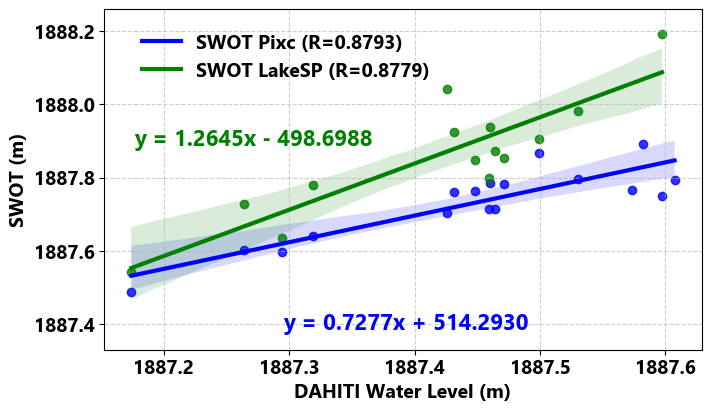

In [195]:
def plot_correlation(ax, ref_vars_df, var_ref_name='dahiti_wse', y_range = None, y_step=0.2, x_step=0.1,\
                    var_1_name = 'SWOT_pixc_wse', var_2_name = 'SWOT_LakeSP_wse', 
                    var_1_label='SWOT Pixc', var_2_label= 'SWOT LakeSP', label_loc = (0.05, 0.77), label_fontsize=14,
                    equation_1_loc=(0.3, 0.06), equation_1_fontsize=16,
                    equation_2_loc=(0.05, 0.60), equation_2_fontsize=16
                     ):
     rmse_var_1, rmse_var_2, corr_var_1, corr_var_2 = calculate_rmse_corr(ref_vars_df, 
                                                                          var_ref_name=var_ref_name, 
                                                                          var_1_name= var_1_name, 
                                                                          var_2_name=var_2_name)
     slope_var_1, intercept_var_1, slope_var_2, intercept_var_2 = calculate_slope_intercept(ref_vars_df, 
                                                                                            var_ref_name=var_ref_name, 
                                                                                            var_1_name=var_1_name, 
                                                                                            var_2_name=var_2_name)
     ## using seaborn for confidence interval ploting
     sns.regplot(x=var_ref_name, y=var_1_name, data=ref_vars_df,  
                    ax=ax,
                    scatter_kws={'color': 'blue', 'alpha': 0.8}, 
                    line_kws={'color': 'blue','linewidth': 3, 'label': f'{var_1_label} (R={corr_var_1:.4f})'})
     ## using seaborn for confidence interval ploting
     sns.regplot(x=var_ref_name, y=var_2_name, data=ref_vars_df,  
                    ax=ax,
                    scatter_kws={'color': 'green', 'alpha': 0.8}, 
                    line_kws={'color': 'green','linewidth': 3, 'label': f'{var_2_label} (R={corr_var_2:.4f})'})

     equation_ref_var_1 = f'y = {slope_var_1:.4f}x + {intercept_var_1:.4f}' \
                                             if intercept_var_1 >= 0 else f'y = {slope_var_1:.4f}x - {-intercept_var_1:.4f}'
     equation_ref_var_2 = f'y = {slope_var_2:.4f}x + {intercept_var_2:.4f}' \
                                             if intercept_var_2 >= 0 else f'y = {slope_var_2:.4f}x - {-intercept_var_2:.4f}'
     ax.text(equation_1_loc[0], equation_1_loc[1], equation_ref_var_1, transform=ax.transAxes,
          fontsize=equation_1_fontsize, color='blue', ha='left', bbox=dict(facecolor='none', alpha=0.8, edgecolor='none'))
     ax.text(equation_2_loc[0], equation_2_loc[1], equation_ref_var_2, transform=ax.transAxes,
          fontsize=equation_2_fontsize, color='green', ha='left', bbox=dict(facecolor='none', alpha=0.8, edgecolor='none'))

     # # 设置坐标轴格式
     ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))  # 显示一位小数
     ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))  # 显示一位小数
     ax.xaxis.set_major_locator(MultipleLocator(x_step)) 
     ax.yaxis.set_major_locator(MultipleLocator(y_step)) 
     ## set y axis limits
     if y_range is not None:
          ax.set_ylim([y_range[0], y_range[1]]); 

     ax.legend(fontsize=label_fontsize, frameon=False, loc=label_loc)
     ax.set_xlabel('DAHITI Water Level (m)', fontsize=14)
     ax.set_ylabel('SWOT (m)', fontsize=14)
     ax.tick_params(axis='both', labelsize=14)
     ax.grid(True, linestyle='--', alpha=0.6)
     return ax

fig, ax = plt.subplots(figsize=(7, 4), constrained_layout=True)
ax = plot_correlation(ax=ax, ref_vars_df=dahiti_pix_lakesp_dianchi, y_range=[1887.33,1888.26], y_step=0.2, x_step=0.1, \
                      var_ref_name='dahiti_wse', var_1_name='SWOT_pixc_wse', var_2_name='SWOT_LakeSP_wse')



In [167]:
# fig, ax = plt.subplots(figsize=(7, 4), constrained_layout=True)
# ax = plot_correlation(ax=ax, ref_vars_df=dahiti_pix_lakesp_erhai, \
#                       var_ref_name='dahiti_wse', var_1_name='SWOT_pixc_wse', var_2_name='SWOT_LakeSP_wse')


<Axes: ylabel='Height In (m)'>

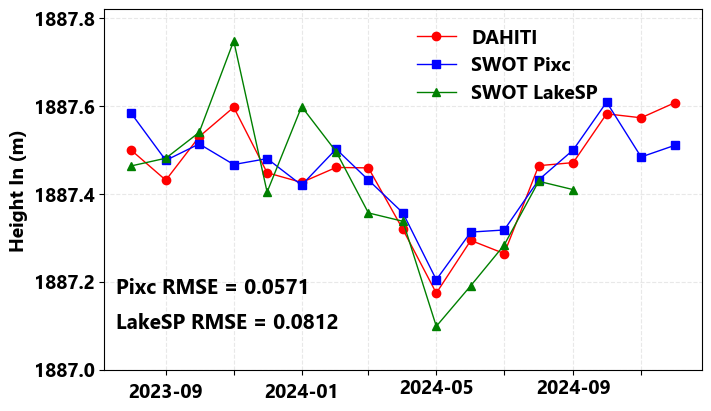

In [ ]:
# pixc_lakesp_dahiti_df = pd.DataFrame(pixc_lakesp_dahiti_df)
def plot_wse(ax, ref_vars_df, y_range = None, y_step=0.2, x_step=2,
             var_ref_name='dahiti_wse', var_1_name='SWOT_pixc_wse_cor', var_2_name='SWOT_LakeSP_wse_cor', 
             var_ref_label='DAHITI', var_1_label='SWOT Pixc', var_2_label='SWOT LakeSP', label_loc=(0.51, 0.72), labels_fontsize=14,
             rmse_label_1 = 'Pixc RMSE', rmse_label_2 = 'LakeSP RMSE', rmse_label_loc=(0.02, 0.1), rmse_label_fontsize=15):

        rmse_var_1, rmse_var_2, corr_var_1, corr_var_2 = calculate_rmse_corr(ref_vars_df, var_ref_name=var_ref_name, 
                        var_1_name=var_1_name, var_2_name=var_2_name)        
        date_year_month = pd.to_datetime(ref_vars_df.index) 

        ax.plot(date_year_month, ref_vars_df[var_ref_name], 
                label=var_ref_label, color='red', marker='o', markersize=6, 
                linewidth=1, linestyle='-')
        ax.plot(date_year_month, ref_vars_df[var_1_name], 
                label=var_1_label, color='blue', marker='s', markersize=6, 
                linewidth=1, linestyle='-')
        ax.plot(date_year_month, ref_vars_df[var_2_name], 
                label=var_2_label, color='green', marker='^', markersize=6, 
                linewidth=1, linestyle='-')

        ax.grid(True, linestyle='--', alpha=0.5, color='lightgray')
        # 添加标注
        ax.text(rmse_label_loc[0], rmse_label_loc[1],
                f'{rmse_label_1} = {rmse_var_1:.4f}\n\n{rmse_label_2} = {rmse_var_2:.4f}',
                fontsize=rmse_label_fontsize, verticalalignment='bottom', 
                horizontalalignment='left', transform=ax.transAxes,
                linespacing=0.8)

        ax.legend(loc=label_loc, frameon=False, fontsize=labels_fontsize)
        # 固定刻度位置和标签
        specific_months = ['2023-09', '2024-01', '2024-05', '2024-09']
        specific_dates = [pd.to_datetime(month + '-01') for month in specific_months]

        ax.set_xticks(specific_dates)
        ax.set_xticklabels(specific_months)
        plt.xticks(rotation=0, ha='right', fontsize=14)
        for label in ax.get_xticklabels():
                label.set_horizontalalignment('center')
                label.set_position((0, -0.01))

        ## set y axis limits
        if y_range is not None:
                ax.set_ylim([y_range[0], y_range[1]]); 

        ax.set_ylabel('Height In (m)', fontsize=14)
        ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.1f}'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=x_step))
        ax.yaxis.set_major_locator(MultipleLocator(y_step)) 
        ax.tick_params(axis='y', labelsize=14)
        return ax

fig, ax = plt.subplots(figsize=(7, 4), constrained_layout=True)
plot_wse(ax=ax, ref_vars_df=dahiti_pix_lakesp_dianchi, y_range = [1887.0, 1887.82], y_step=0.2, x_step=2)



In [169]:
# fig, ax = plt.subplots(figsize=(7, 4), constrained_layout=True)
# plot_wse(ax=ax, ref_vars_df=dahiti_pix_lakesp_erhai, label_loc=(0.41, 0.72), rmse_label_loc=(0.03, 0.1))


### 2. weighted vs unweighted

In [170]:
path_dahiti_unweighted_weighted_dianchi = 'data/eva_data/dahiti_unweighted_weighted_dianchi.csv' ## 
path_dahiti_unweighted_weighted_erhai = 'data/eva_data/dahiti_unweighted_weighted_erhai.csv' ## 
dahiti_unweighted_weighted_dianchi = pd.read_csv(path_dahiti_unweighted_weighted_dianchi, index_col=0)
dahiti_unweighted_weighted_erhai = pd.read_csv(path_dahiti_unweighted_weighted_erhai, index_col=0)


In [171]:
rmse_weighted_unweighted_dianchi, rmse_weighted_unweighted_dianchi, corr_weighted_unweighted_dianchi,\
                                    corr_weighted_unweighted_dianchi = calculate_rmse_corr(dahiti_unweighted_weighted_dianchi, var_ref_name='dahiti_wse', 
                                    var_1_name='pixc_wse_weighted_cor', 
                                    var_2_name='pixc_wse_unweighted_cor')


<Axes: ylabel='Height In (m)'>

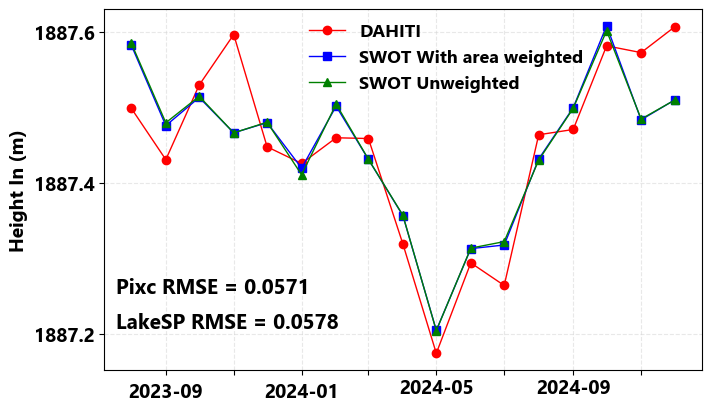

In [172]:
fig, ax = plt.subplots(figsize=(7, 4), constrained_layout=True)
plot_wse(ax=ax, ref_vars_df=dahiti_unweighted_weighted_dianchi, \
            var_ref_name='dahiti_wse',  var_1_name='pixc_wse_weighted_cor', var_2_name='pixc_wse_unweighted_cor',
            var_ref_label='DAHITI', var_1_label='SWOT With area weighted', var_2_label='SWOT Unweighted', label_loc=(0.33, 0.75), 
            labels_fontsize=13, rmse_label_1 = 'Pixc RMSE', rmse_label_2 = 'LakeSP RMSE', rmse_label_loc=(0.02, 0.1))



In [173]:
# fig, ax = plt.subplots(figsize=(7, 4), constrained_layout=True)
# plot_wse(ax=ax, ref_vars_df=dahiti_unweighted_weighted_erhai, \
#             var_ref_name='dahiti_wse',  var_1_name='pixc_wse_weighted_cor', var_2_name='pixc_wse_unweighted_cor',
#             var_ref_label='DAHITI', var_1_label='SWOT With area weighted', var_2_label='SWOT Unweighted', label_loc=(0.33, 0.75), 
#             labels_fontsize=13, rmse_label_1 = 'Pixc RMSE', rmse_label_2 = 'LakeSP RMSE', rmse_label_loc=(0.02, 0.1))


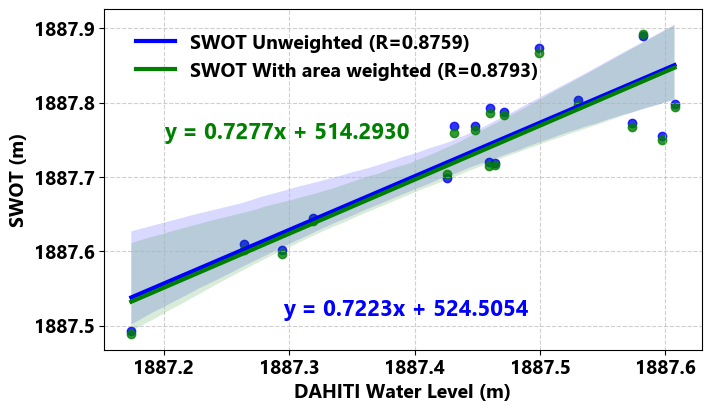

In [197]:
fig, ax = plt.subplots(figsize=(7, 4), constrained_layout=True)
ax = plot_correlation(ax=ax, ref_vars_df=dahiti_unweighted_weighted_dianchi, y_step=0.1, \
                      var_ref_name='dahiti_wse', var_1_name='pixc_wse_unweighted', var_2_name='pixc_wse_weighted', var_1_label='SWOT Unweighted', var_2_label='SWOT With area weighted', label_fontsize=14, 
                      label_loc=(0.04, 0.77), equation_1_loc=(0.3, 0.1), equation_1_fontsize=16, 
                      equation_2_loc=(0.1, 0.62), equation_2_fontsize=16)



In [193]:
# fig, ax = plt.subplots(figsize=(7, 4), constrained_layout=True)
# ax = plot_correlation(ax=ax, ref_vars_df=dahiti_unweighted_weighted_erhai, x_step=0.2, \
#                       var_ref_name='dahiti_wse', var_1_name='pixc_wse_unweighted', var_2_name='pixc_wse_weighted', var_1_label='SWOT Unweighted', var_2_label='SWOT With area weighted', label_fontsize=14, 
#                       label_loc=(0.04, 0.77), equation_1_loc=(0.3, 0.1), equation_1_fontsize=16, 
#                       equation_2_loc=(0.1, 0.62), equation_2_fontsize=16)
